In [1]:
from unet_project.image_utils import ImageUtils
from unet_project.data_augmentation import DataAugmentation
from unet_project.u_net import Unet
from unet_project.create_patches import PatchesCreator
from skimage.io import imshow
from matplotlib import pyplot as plt
import numpy as np
import cv2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from skimage.io import imshow
from matplotlib import pyplot as plt
import random
from keras.models import load_model

Using TensorFlow backend.


In [27]:
path_to_imgs = '/home/ajuska/Dokumenty/Skola/diplomka/test_folder/imgs/'
path_to_masks = '/home/ajuska/Dokumenty/Skola/diplomka/test_folder/masks/'
img_height = 224
img_width = 224
img_channels = 3

image_utils = ImageUtils(path_to_imgs, path_to_masks, img_height, img_width)
imgs_masks = image_utils.get_preprocessed_images()

data_augmentor = DataAugmentation(imgs_masks, how_many=1)
aug_imgs, aug_masks = data_augmentor.extend_database()

patches_creator = PatchesCreator(aug_imgs, aug_masks, img_height, img_width)
imgs_patches, masks_patches = patches_creator.create_patches()

  6%|▋         | 1/16 [00:00<00:02,  7.45it/s]

Loading images.


  0%|          | 0/16 [00:00<?, ?it/s]/home/ajuska/Dokumenty/Skola/diplomka/diplomka/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "



Loading masks.

Preprocessing images.

Extending database.


100%|██████████| 16/16 [00:01<00:00, 11.81it/s]


Creating patches.


In [28]:
trainX = np.array([x/255 for x in imgs_patches])
trainY = np.array([x/255 for x in masks_patches])

In [ ]:
unet = Unet(img_height=img_height, img_width=img_width, img_channels=img_channels)
model = unet.create_model()
earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-test.h5', verbose=1, save_best_only=True)
results = model.fit(trainX, trainY, validation_split=0.1, batch_size=16, epochs=10,
                    callbacks=[earlystopper, checkpointer])

Creating model.
Train on 353 samples, validate on 40 samples
Epoch 1/10
353/353 [==============================] - 283s 802ms/step - loss: 0.4294 - acc: 0.8693 - val_loss: 0.3453 - val_acc: 0.8873

Epoch 00001: val_loss improved from inf to 0.34530, saving model to model-test.h5
Epoch 2/10


In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [20]:
preds = model.predict(np.array(extended_imgs).astype(np.uint8)[10:20])
preds_t = (preds > 0.15).astype(np.uint8)

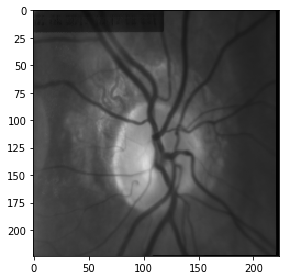

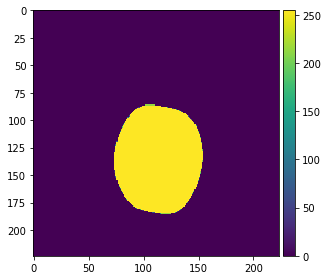

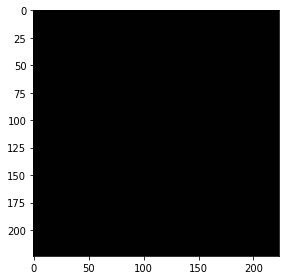

In [21]:
imshow(np.array(extended_imgs).astype(np.uint8)[16])
plt.show()
imshow(np.squeeze(np.array(extended_masks)[16]))
plt.show()
imshow(np.squeeze(preds_t[6]))
plt.show()